# Prescription Pickup Prediction

## About project

When patients don't pick up their prescriptions, they can get very sick. 
If the conditions are serious, they can end up in the hospital. 
If they have taken their medications, then they could've avoided hospitalization.
As we all know hospital bills are exorbitant. 
One instance where medication non-adherence triggers repeated hospital admissions is the brand drug 'Entresto' for heart failure . 
In the last few years, the brand drug has demonstrated benefits to reduce mortality and also reduce hospital admissions [(source)](https://www.acc.org/Latest-in-Cardiology/Clinical-Trials/2014/08/30/12/22/PARADIGM-HF).
However, the expensive cost may lead to non-adherence, such as patients not picking up their medications.
Data shows that poor heart failure management is a common reason why patients end up returning to hospitals[(source)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10612439/#:~:text=the%20initial%20admission.-,Hospitalized%20patients%20with%20HF%20have%20the%20highest%2030%2Dday%20readmission,et%20al.%2C%202018) .

## About the Data set

This synthetic dataset gives information about patients' characteristics like annual salary and whether they pick up their prescription of Entresto or not. There are only 7 columns. We will use the dataset to make a model to predict if  a person will pick up Enstresto or not with logistic regression.


* Attribute Information
  +	rx_id 
      +	__Meaning__: The unique ID for the prescription
      +	__Variable Type__: string
      +	__Possible values__:  any number from 1 to infinity
  +	patient_id 
      +	__Meaning__: The unique ID of the patient 
      +	__Variable Type__: string
      +	__Possible values__:  any number from 1 to infinity
  +	brand_name 
      +	__Meaning__: the name of the drug
      +	__Variable Type__: string
      +	__Possible values__:  'entresto'
  +	gender 
      +	__Meaning__: biological sex of the patient
      +	__Variable Type__: character
      +	__Possible values__:  'm' , 'f'
  +	annual_salary 
      +	__Meaning__: how much money the patient makes in a year
      +	__Variable Type__: integer
      +	__Possible values__:  10000,30000,etc

  +	is_healthcare_major
      +	__Meaning__: Was this person's college education related to healthcare?
      +	__Variable Type__: integer
      +	__Possible values__:  1 if true , 0 if false
      
  +	is_fill 
      +	__Meaning__: was the prescription picked up from the pharmacy?
      +	__Variable Type__: integer
      +	__Possible values__:  1 if true , 0 if false

## Table of content

1. Import libraries
2. Data load and EDA
3. Preparing ML models
4. Model in action and interpretation
5. Models evaluation
6. Conclusion

## 1.Import libraries 

In [21]:
import statsmodels.api as sm 
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve,roc_auc_score

## 2.Data load and EDA

In [22]:
# loading the  dataset  
df = pd.read_excel(r"dataset.xlsx")

df['rx_id'] = df['rx_id'].astype(str)
df['patient_id'] = df['patient_id'].astype(str)

C:\Users\jonly\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Web Extension extension is not supported and will be removed
  for idx, row in parser.parse():


In [23]:
df.head()

,rx_id,patient_id,brand_name,gender,annual_salary,is_healthcare_major,is_filled
0,1,1,entresto,m,30000,1,1
1,2,2,entresto,f,40000,1,1
2,3,3,entresto,m,35000,1,1
3,4,4,entresto,f,34000,1,1
4,5,5,entresto,m,50000,1,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rx_id                202 non-null    object
 1   patient_id           202 non-null    object
 2   brand_name           202 non-null    object
 3   gender               202 non-null    object
 4   annual_salary        202 non-null    int64 
 5   is_healthcare_major  202 non-null    int64 
 6   is_filled            202 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 11.2+ KB


In [25]:
df.describe()

,annual_salary,is_healthcare_major,is_filled
count,202.000000,202.000000,202.000000
mean,39166.198020,0.460396,0.500000
std,32267.926449,0.499667,0.501242
min,3000.000000,0.000000,0.000000
25%,11500.000000,0.000000,0.000000
50%,34000.000000,0.000000,0.500000
75%,50000.000000,1.000000,1.000000
max,140000.000000,1.000000,1.000000


In [26]:
df['brand_name'].value_counts()

entresto    202
Name: brand_name, dtype: int64

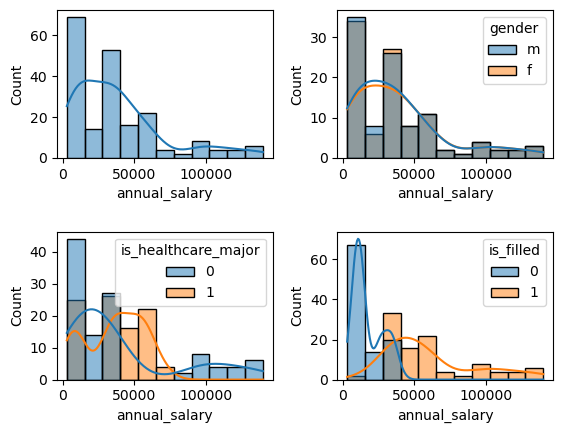

In [27]:
# See distributions of  general salary and different subgroups' salary
fig, axes = plt.subplots(2, 2)
sns.histplot(data=df, x='annual_salary', kde=True, ax=axes[0, 0])
sns.histplot(data=df, x='annual_salary', kde=True, hue='gender', ax=axes[0, 1])
sns.histplot(data=df, x='annual_salary', kde=True, hue='is_healthcare_major', ax=axes[1, 0])
sns.histplot(data=df, x='annual_salary', kde=True, hue='is_filled', ax=axes[1, 1])
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

- Insight: We can see that the overall salary distribution is skewed to the right.
- Insight: We see that gender and healthcare major have lots of overlap so they don't seem to influence salary.
- Insight: However,there seems to be a difference in salary versus filling a medication. Higher salary seems to fill their medication versus lower salary.

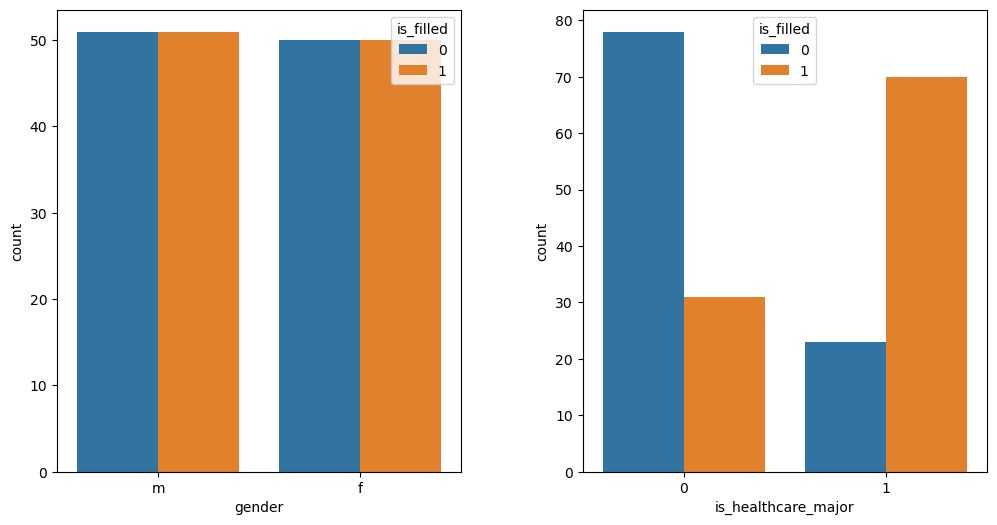

In [28]:
# Visually see if there is a proportional difference in filling a medication by gender and if healthcare major
fig, axes = plt.subplots(1, 2 , figsize=(12, 6))
sns.countplot(data = df,x=df['gender'],hue=df['is_filled'],  ax=axes[0])
sns.countplot(data = df,x=df['is_healthcare_major'],hue=df['is_filled'],ax=axes[1])
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

- insight: Gender doesn't seem to play a role as the proportions of filling or not are pretty even between the genders
- insight: Seems like those that were healthcare major in college would influence a person's decision to pick up the medication. Visually, we can see those that were healthcare majors in college had much high proportions of filling. Those that weren't in healthcare majors in college had much higher proportions of not filling the medication. 

## 3. Preparing ML models

In [29]:
# Computers aren't good with strings so we will encode the categorical variable
# Then we will drop one of the column to avoid multicollinearity
# 1 means it is male and 0 means it is female 
gender = pd.get_dummies(df['gender'], drop_first=True).rename(columns={'m':'gender_m'})
gender

,gender_m
0,1
1,0
2,1
3,0
4,1
...,...
197,1
198,0
199,1
200,0


In [30]:
# Drop the original gender column since we don't need it anymore
df.drop('gender',axis=1,inplace=True)
df = pd.concat([df,gender], axis=1)
df.head()

,rx_id,patient_id,brand_name,annual_salary,is_healthcare_major,is_filled,gender_m
0,1,1,entresto,30000,1,1,1
1,2,2,entresto,40000,1,1,0
2,3,3,entresto,35000,1,1,1
3,4,4,entresto,34000,1,1,0
4,5,5,entresto,50000,1,1,1


In [31]:
#  creating different dataframes to hold the features and hold the target variable
X =df[['gender_m','annual_salary','is_healthcare_major']]
y= df[['is_filled']]

In [32]:
# Test for multicollinearity

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["features"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

              features       VIF
0             gender_m  1.563875
1        annual_salary  1.574921
2  is_healthcare_major  1.437768


- insight: All features have VIF values less than 5 so probably no multicollinearity 

In [33]:
# SPLIT DATA TO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [34]:
X_train

,gender_m,annual_salary,is_healthcare_major
200,0,8000,1
143,1,140000,0
69,0,11000,0
150,0,10000,0
42,1,120000,0
...,...,...,...
133,1,43000,1
137,1,97000,0
72,1,15000,0
140,0,140000,0


In [35]:
y_train

,is_filled
200,0
143,1
69,0
150,0
42,1
...,...
133,1
137,1
72,0
140,1


## 4. Model in action and interpretation

In [36]:
#Need to add the intercept constant. Statsmodel turns it off on default.
X_train = sm.add_constant(X_train)

# building the model and fitting the data 
log_reg = sm.Logit(y_train, X_train).fit() 



Optimization terminated successfully.
         Current function value: 0.112241
         Iterations 11


In [37]:
# printing the summary table 
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:              is_filled   No. Observations:                  141
Model:                          Logit   Df Residuals:                      137
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.8381
Time:                        21:09:50   Log-Likelihood:                -15.826
converged:                       True   LL-Null:                       -97.730
Covariance Type:            nonrobust   LLR p-value:                 2.762e-35
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -11.9699      3.219     -3.718      0.000     -18.280      -5.660
gender_m                0.4844      0.975      0.497      0.619      -1.427       2.396
annual_salary   

- insight: As expected , gender wasn't statisically significant. The visual showed the proportions of filling were similiar between the two genders.
- insight: The log odds of annual_salary  is 0.0003 . Convert this to odds with e^(0.0003) = 1.0003 . It is greater than 1 so annual_salary has a positive effect in filling a med.
- insight: The log odds of is_healthcare_major is 6.8 . Convert this to odds with e^(6.8) = 898. It is greater than 1 so being a healthcare major has a positive effect in filling a med.

## 5. Models evaluation

In [38]:
#since we added a constant for the training set, we need to add it for the testing set
X_test = sm.add_constant(X_test)

# performing predictions on the test dataset 
y_predicted_prob = log_reg.predict(X_test)
y_predicted_prob.head(5)

196    0.096500
95     0.055868
173    0.000264
123    0.999957
38     1.000000
dtype: float64

In [39]:
# Assume probabilities 50% or greater will fill the medication
y_predicted = list(map(round, y_predicted_prob))

actual = y_test.values.flatten()
actual = [', '.join(map(str, actual))]

    
# comparing original and predicted values of y 
print('Actual values :', actual) 
print('Predictions :', y_predicted) 

Actual values : ['0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1']
Predictions : [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


In [40]:
# confusion matrix 
cm = confusion_matrix(y_test, y_predicted)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, y_predicted))

Confusion Matrix : 
 [[31  0]
 [ 3 27]]
Test accuracy =  0.9508196721311475


##  6. Conclusion

- Our model was about 95% accurate in predicting if an user will pick up his/her entresto. This is probably unrealistic since the data set was fake and reality is complicated.However, ways of improving the model are to get more samples, more features, cross validation , hyper parameter tuning ,etc.

- The logistic regression showed that healthcare major has an impact on whether a patient filled Entresto or not. Perhaps, an intervention would be to sent an educational link to the patients that weren't in healthcare major. The link would provide more medical info about the medication and about the potential dangers of uncontroll heart failure.

- Money seems to be a factor of whether a patient decides to pick up Enstreto or not. An intervention would be to contact the manufacturer for special coupons so that the patients can afford the medication.